# Agrupamento de dados

O agrupamento de dados, conhecido como clustering em inglês, é uma técnica de análise de dados utilizada para agrupar um conjunto de objetos de forma que objetos no mesmo grupo (ou cluster) sejam mais semelhantes entre si do que com objetos de outros grupos. O objetivo principal é segmentar os dados em grupos significativos e interpretáveis, sem a necessidade de rótulos prévios para os grupos. O clustering é amplamente utilizado em diversas áreas, como mineração de dados, aprendizado de máquina, reconhecimento de padrões, entre outros, para identificar padrões e estruturas nos dados não rotulados.

### Configuração de dados

In [1]:
# Importando biblioteca pandas
import pandas as pd

# Importando classe MinMaxScaler da biblioteca scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Importando dados
df = pd.read_csv('datas/diabetes.csv')

for coluna in df.columns:
    
    # Calculando mediana
    mediana_coluna = df[coluna].median()
    
    # Substitui os valores nulos pela mediana da coluna usando loc
    df.loc[df[coluna].isnull(), coluna] = mediana_coluna

    # Normalizando dados
    df[coluna] = MinMaxScaler().fit_transform(df[[coluna]])

# Visualizando dados
df.head(3)

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.0,0.500745,0.269183,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.0,0.396423,0.150672,0.166667
2,0.470588,0.919598,0.524590,0.232323,0.0,0.347243,0.288505,0.183333


## Agrupamento K-Means

Usado para agrupar dados não rotulados em clusters com base em suas características. O K-Means visa encontrar grupos nos dados, com um número de grupos (ou clusters) especificado. Sua utilidade está em explorar padrões em conjuntos de dados. 

O funcionamento básico do algoritmo K-Means é o seguinte:

1. Inicializa os centróides dos clusters de forma aleatória.
2. Atribui cada ponto de dados ao centróide mais próximo, formando clusters.
3. Calcula os novos centróides de cada cluster, com base nos pontos atribuídos a eles.
4. Repete os passos 2 e 3 até que os centróides não mudem significativamente ou até que um número máximo de iterações seja atingido.

In [2]:
# Importando a classe KMeans do módulo cluster da biblioteca scikit-learn
from sklearn.cluster import KMeans

km = KMeans(
        n_clusters=2, # número de clusters desejado (neste caso, 2)
        init='k-means++', # inicialização dos centróides ('k-means++' para inicialização inteligente)
        max_iter=300, # máximo de iterações para cada execução do algoritmo (padrão: 300)
        n_init=10, # vezes que o algoritmo será executado com diferentes centróides iniciais (padrão: 10)
        random_state=0) # semente para a geração de números aleatórios (reproducibilidade dos resultados)

# Aplicando o algoritmo KMeans aos dados do DataFrame
km.fit(df)

KMeans(n_clusters=2, n_init=10, random_state=0)

## Agrupamento Expectation-Maximization

O Expectation-Maximization (EM) é usado para modelar dados não rotulados e é especialmente útil quando os dados possuem distribuições ocultas. O objetivo do EM é encontrar os parâmetros de um modelo de mistura de distribuições probabilísticas que melhor descrevem os dados.

O funcionamento básico do algoritmo Expectation-Maximization é o seguinte:

1. Inicializa os parâmetros do modelo de mistura de forma aleatória ou usando alguma heurística.
2. Passo de Expectation (E-step): Calcula a probabilidade de cada ponto de dados pertencer a cada componente da mistura (responsabilidades).
3. Passo de Maximization (M-step): Atualiza os parâmetros do modelo para maximizar a probabilidade conjunta dos dados e das 4. responsabilidades calculadas no passo anterior.
4. Repete os passos 2 e 3 até que os parâmetros converjam ou até que um critério de parada seja atingido.

In [3]:
# Importando a classe GaussianMixture do módulo misture da biblioteca scikit-learn
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(
                n_components=2, # número de clusters desejado (neste caso, 2)
                covariance_type='spherical') # Tipo de covariância (nesse caso, esférica)

# Aplicando o algoritmo GMM aos dados do DataFrame
gmm.fit(df)

GaussianMixture(covariance_type='spherical', n_components=2)

Além do spherical, os outros tipos de covariância são:

1. 'tied': Neste caso, todas as componentes do modelo compartilham a mesma matriz de covariância, que é uma matriz completa e simétrica. Isso significa que todas as variáveis têm a mesma covariância entre si.

2. 'diag': Neste caso, cada componente tem sua própria matriz diagonal de covariância, o que significa que as variáveis são consideradas independentes umas das outras, exceto pela sua variância. Ou seja, a covariância entre diferentes dimensões é zero.

3. 'full': Neste caso, cada componente do modelo tem sua própria matriz completa e simétrica de covariância. Isso significa que não há restrições nas covariâncias entre as diferentes variáveis, permitindo correlações arbitrárias entre elas.

Em alguns casos, a escolha deles podem afetar significativamente o agrupamento dos dados.

## Agrupamento Hierarquico Aglomerativo

O Agrupamento Hierárquico Aglomerativo é um algoritmo de agrupamento hierárquico que constrói uma árvore de clusters. Ele começa com cada ponto de dados como um cluster separado e, em seguida, mescla os clusters mais próximos com base em uma métrica de distância até restar apenas um cluster.

A ideia básica do algoritmo é a seguinte:

1. Comece com cada ponto de dados como um cluster separado.
2. Mescle os dois clusters mais próximos em um único cluster.
4. Atualize a matriz de distância para refletir as novas distâncias entre clusters.
5. Repita os passos 2 e 3 até que reste apenas um cluster.

O Agrupamento Hierárquico Aglomerativo é útil para explorar relacionamentos hierárquicos nos dados e pode ser visualizado como um dendrograma, que mostra como os clusters são mesclados em cada etapa.

In [4]:
# Importando a classe AgglomerativeClustering do módulo cluster da biblioteca scikit-learn
from sklearn.cluster import AgglomerativeClustering

ha = AgglomerativeClustering(
                n_clusters=2, # número de clusters desejado (neste caso, 2)
                linkage='complete') # método de ligação para calcular a distância entre os clusters

# Aplicando o algoritmo HA aos dados do DataFrame
ha.fit(df)

AgglomerativeClustering(linkage='complete')

O parâmetro linkage no algoritmo de Agrupamento Hierárquico Aglomerativo define a estratégia utilizada para calcular a distância entre os clusters durante a mesclagem. Existem diferentes métodos de ligação (linkage) disponíveis:

1. 'complete': Calcula a distância máxima entre os pontos de dois clusters. A distância entre dois clusters é a distância máxima entre seus pontos.

2. 'single': Calcula a distância mínima entre os pontos de dois clusters. A distância entre dois clusters é a distância mínima entre seus pontos.

4. 'average': Calcula a média das distâncias entre os pontos de dois clusters. A distância entre dois clusters é a média das distâncias entre seus pontos.

5. 'ward': Minimiza a variância dos clusters sendo mesclados. Essa abordagem tende a formar clusters de tamanhos relativamente iguais.

## Agrupamento DBSCAN

O DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é um algoritmo de agrupamento baseado em densidade que é capaz de identificar clusters de formatos e tamanhos arbitrários em um conjunto de dados. Ele é especialmente útil quando os clusters têm densidades diferentes, pois ele define clusters como regiões de alta densidade separadas por regiões de baixa densidade.

O funcionamento básico do algoritmo DBSCAN é o seguinte:

1. Cada ponto de dados é classificado como um ponto central, um ponto de borda ou um ponto de ruído.
2. Para cada ponto central, o algoritmo forma um cluster ao seu redor, incluindo todos os pontos alcançáveis por densidade a partir desse ponto.
3. Pontos de borda são aqueles que estão dentro da vizinhança de densidade de um ponto central, mas não são pontos centrais eles próprios. Eles são atribuídos ao cluster do ponto central mais próximo em sua vizinhança.
4. Pontos de ruído são aqueles que não são pontos centrais nem pontos de borda e são descartados ou considerados outliers.

O DBSCAN é útil para encontrar clusters em conjuntos de dados onde os clusters têm diferentes densidades ou quando há presença de ruído nos dados. Ele não requer a especificação do número de clusters a priori, o que o torna uma escolha popular para muitos problemas de agrupamento. Além disso, o DBSCAN é capaz de lidar com clusters de forma arbitrária, não se limitando a formas geométricas específicas.

In [5]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(
        eps=0.35, # raio máximo entre dois pontos para serem considerados vizinhos
        min_samples=5) # número mínimo de pontos em uma vizinhança para formar um cluster

# Aplicando o algoritmo DBSCAN aos dados do DataFrame
dbs.fit(df)

DBSCAN(eps=0.35)

## Visualização de Dados 2D

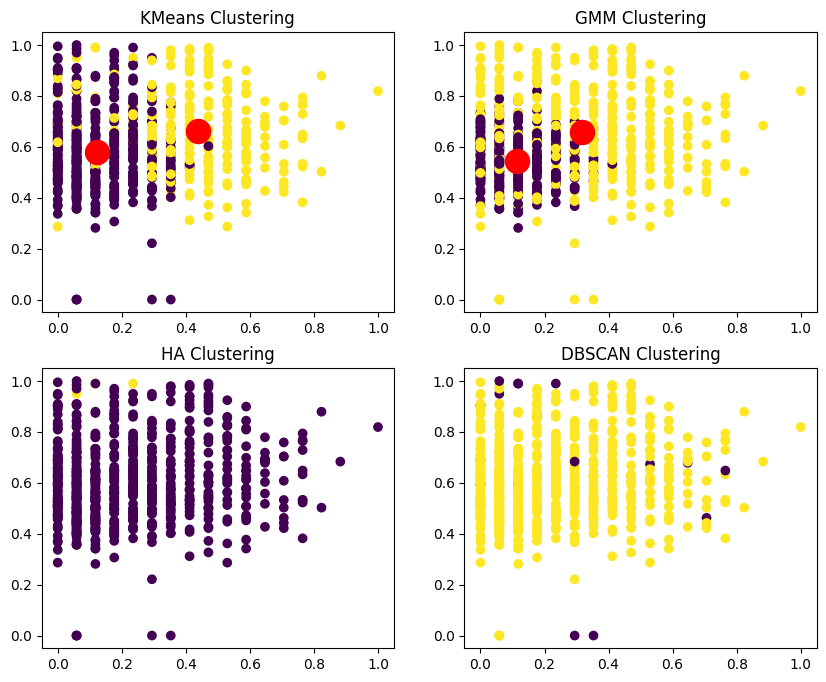

In [6]:
# Importando a biblioteca matplotlib para visualização de dados
import matplotlib.pyplot as plt

# Criando a figura e os subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8)) 

# Gráfico KMeans

# Calculando centróides
centroids_km = km.cluster_centers_
# Plot dos dados com cores de acordo com os clusters
axs[0][0].scatter(df.iloc[:, 0], df.iloc[:, 1], c=km.labels_, cmap='viridis')  
# Plot dos centróides em vermelho
axs[0][0].scatter(centroids_km[:, 0], centroids_km[:, 1], c='red', s=300)  
# Adicionando título
axs[0][0].set_title('KMeans Clustering') 

# Gráfico GMM

# Calculando centróides
centroids_gmm = gmm.means_
# Plot dos dados com cores de acordo com os clusters
axs[0][1].scatter(df.iloc[:, 0], df.iloc[:, 1], c=gmm.predict(df), cmap='viridis')  
# Plot dos centróides em vermelho
axs[0][1].scatter(centroids_gmm[:, 0], centroids_gmm[:, 1], c='red', s=300)  
# Adicionando título
axs[0][1].set_title('GMM Clustering') 

# Gráfico Hierarchical Agglomerative Clustering

# Plot dos dados com cores de acordo com os clusters
axs[1][0].scatter(df.iloc[:, 0], df.iloc[:, 1], c=ha.labels_, cmap='viridis')  
# Adicionando título
axs[1][0].set_title('HA Clustering') 

# Gráfico DBSCAN

# Plot dos dados com cores de acordo com os clusters
axs[1][1].scatter(df.iloc[:, 0], df.iloc[:, 1], c=dbs.labels_, cmap='viridis')  
# Adicionando título
axs[1][1].set_title('DBSCAN Clustering') 

plt.show()  # Exibindo os gráficos

## Visualização de Dados 3D

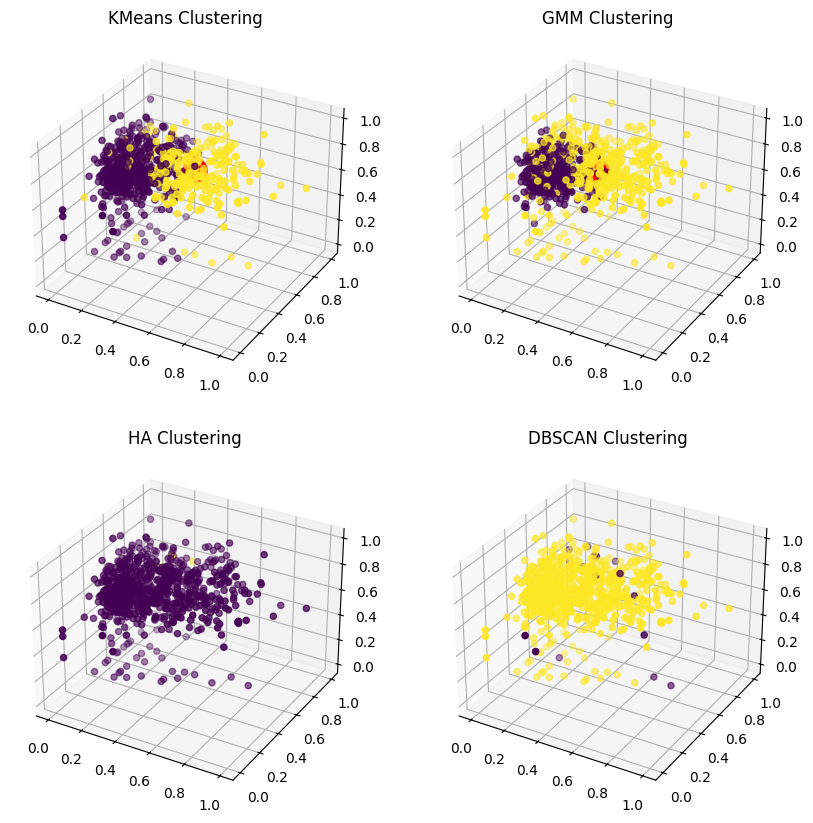

In [7]:
# Importando a classe Axes3D do módulo mpl_toolkits.mplot3d para plotagem em 3D
from mpl_toolkits.mplot3d import Axes3D

# Criando uma figura com quatro subplots em 3D
fig, axs = plt.subplots(2, 2, figsize=(10, 10), subplot_kw={'projection': '3d'})

# Gráfico KMeans

# Plot dos dados com cores de acordo com os clusters
axs[0, 0].scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=km.labels_, cmap='viridis') 
# Plot dos centróides em vermelho
axs[0, 0].scatter(centroids_km[:, 0], centroids_km[:, 1], centroids_km[:, 2], c='red', s=300)
# Adicionando título ao subplot 1
axs[0, 0].set_title('KMeans Clustering')

# Gráfico GMM

# Plot dos dados com cores de acordo com os clusters
axs[0, 1].scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=gmm.predict(df), cmap='viridis')
# Plot dos centróides em vermelho
axs[0, 1].scatter(centroids_gmm[:, 0], centroids_gmm[:, 1], centroids_gmm[:, 2], c='red', s=300)
# Adicionando título ao subplot 2
axs[0, 1].set_title('GMM Clustering')

# Gráfico Hierarchical Agglomerative Clustering

# Plot dos dados com cores de acordo com os clusters
axs[1, 0].scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=ha.labels_, cmap='viridis')
# Adicionando título ao subplot 3
axs[1, 0].set_title('HA Clustering')

# Gráfico DBSCAN

# Plot dos dados com cores de acordo com os clusters
axs[1, 1].scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=dbs.labels_, cmap='viridis')
# Adicionando título ao subplot 4
axs[1, 1].set_title('DBSCAN Clustering')

plt.show() # Exibindo os gráficos

## Considerações Finais

Como pode ser visto nos gráficos 2D e 3D, após o agrupamento, os dados tendem a se concentrar em volta dos centróides que são dois, visto que correspondem ao número de clusters especificado.